In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
dist_funding = pd.read_csv('data/dist_funding.csv')
enrollment = pd.read_csv('data/enrollment.csv')
experience = pd.read_csv('data/experience.csv')
funding = pd.read_csv('data/funding.csv')
graduation = pd.read_csv('data/graduation.csv')

In [ ]:
# dist_funding
# enrollment
# experience
# funding
graduation
graduation = graduation.groupby(['School']).sum()
graduation = graduation.reset_index()
graduation['graduation_rate'] = graduation['Graduates'] / graduation['Total']
# Drop Regents Advanced Designation, Regents Diploma, Local Diploma, Still Enrolled, Dropout, GED Transfer
graduation = graduation.drop(['Regents Advanced Designation', 'Regents Diploma', 'Local Diploma', 'Still Enrolled', 'Dropout', 'GED Transfer'], axis=1)
graduation

,School,Total,Graduates,graduation_rate
0,A PHILIP RANDOLPH CAMPUS HIGH SCHOOL,3110,2500,0.803859
1,A-TECH HIGH SCHOOL,770,549,0.712987
2,ABRAHAM LINCOLN HIGH SCHOOL,4010,3214,0.801496
3,ACAD FOR CAREERS-TELEVISION-FILM,1410,1080,0.765957
4,ACAD FOR COLLEGE PREP AND CAREER EXP,370,230,0.621622
...,...,...,...,...
475,YOUNG WOMEN'S LDSHP SCHOOL-BRONX,610,506,0.829508
476,YOUNG WOMEN'S LEADERSHIP SCHOOL,740,420,0.567568
477,YOUNG WOMEN'S LRDSHP-QUEENS,770,671,0.871429
478,YOUNG WOMENS LEADERSHIP SCH-BROOKLY,590,497,0.842373


In [ ]:
funding = funding.groupby('School').sum()
funding = funding.reset_index()
funding

,School,Needs,School_exp,Classroom_Salary,Other_Inst_Salary,Inst_Benefits,Prof_Dev,Admin_Salary,Admin_Benefits,Other_Salaries,Other_Benefits,Other_Exp
0,A PHILIP RANDOLPH CAMPUS HIGH SCHOOL,1,21322.18,5559.35,1170.16,3371.84,0.00,896.29,449.09,793.91,397.79,963.98
1,A-TECH HIGH SCHOOL,1,32050.35,9038.17,2162.82,5612.29,694.56,1140.87,571.64,1352.44,677.64,3080.16
2,ABRAHAM LINCOLN HIGH SCHOOL,1,21281.89,6149.46,1136.92,3650.86,0.00,694.34,347.90,715.58,358.54,508.51
3,ACAD FOR CAREERS-TELEVISION-FILM,1,22144.97,6103.52,1569.49,3844.59,6.77,749.05,375.31,703.07,352.27,721.13
4,ACAD FOR COLLEGE PREP AND CAREER EXP,1,24138.84,5764.27,2065.97,3923.37,0.00,1887.12,945.55,737.27,369.41,726.12
...,...,...,...,...,...,...,...,...,...,...,...,...
448,YOUNG WOMEN'S LDSHP SCHOOL-BRONX,1,22237.62,6088.54,1241.62,3672.80,82.93,782.16,391.90,310.69,155.67,1791.55
449,YOUNG WOMEN'S LEADERSHIP SCHOOL,1,20352.48,6004.90,818.21,3418.74,0.00,938.52,470.25,402.73,201.79,377.59
450,YOUNG WOMEN'S LRDSHP-QUEENS,1,19208.58,5680.16,562.31,3127.80,0.00,784.49,393.07,202.83,101.63,636.53
451,YOUNG WOMENS LEADERSHIP SCH-BROOKLY,1,22949.52,6059.45,1550.88,3813.18,63.66,1229.97,616.28,451.40,226.18,1218.75


In [ ]:
enrollment.columns

Index(['District', 'School', 'Grade', 'Total', 'Male', 'Female', 'Non-binary',
       'American Indian/Alaska Native', 'Black', 'Hispanic/Latino',
       'Asian/Hawaiian/Pacific Islander', 'White', 'Multiracial',
       'Learning English', 'Disabilities', 'Economically Disadvantaged',
       'Migrant', 'Homeless', 'Foster Care', 'Parents In Armed Forces'],
      dtype='object')

In [ ]:
enrollment = enrollment.groupby('School').sum()
enrollment = enrollment.reset_index()
enrollment['male_pct'] = enrollment['Male']/enrollment['Total']
enrollment['female_pct'] = enrollment['Female']/enrollment['Total']
enrollment['asian_pct'] = enrollment['Asian/Hawaiian/Pacific Islander']/enrollment['Total']
enrollment['black_pct'] = enrollment['Black']/enrollment['Total']
enrollment['hispanic_pct'] = enrollment['Hispanic/Latino']/enrollment['Total']
enrollment['white_pct'] = enrollment['White']/enrollment['Total']
enrollment['multi_pct'] = enrollment['Multiracial']/enrollment['Total']
enrollment['native_pct'] = enrollment['American Indian/Alaska Native']/enrollment['Total']
enrollment['learning_english_pct'] = enrollment['Learning English']/enrollment['Total']
enrollment['disability_pct'] = enrollment['Disabilities']/enrollment['Total']
enrollment['poverty_pct'] = enrollment['Economically Disadvantaged']/enrollment['Total']
enrollment['homeless_pct'] = enrollment['Homeless']/enrollment['Total']
# Drop All the above columns like Male, Female, Asian/Hawaiian/Pacific Islander, Black, Hispanic, White, Multiracial, American Indian/Alaska Native, Learning English, Disabilities, Economically Disadvantaged, Homeless
enrollment = enrollment.drop(["Male", "Female", "Asian/Hawaiian/Pacific Islander", "Black", "Hispanic/Latino", "White", "Multiracial", "American Indian/Alaska Native", "Learning English", "Disabilities", "Economically Disadvantaged", "Homeless", "Migrant", "Foster Care", "Parents In Armed Forces", "Non-binary"], axis=1)
enrollment


,School,Grade,Total,male_pct,female_pct,asian_pct,black_pct,hispanic_pct,white_pct,multi_pct,native_pct,learning_english_pct,disability_pct,poverty_pct,homeless_pct
0,A PHILIP RANDOLPH CAMPUS HIGH SCHOOL,42,1474,0.494573,0.505427,0.044776,0.291723,0.622795,0.017639,0.012212,0.010176,0.153324,0.171642,0.873813,0.130936
1,A-TECH HIGH SCHOOL,42,363,0.911846,0.088154,0.035813,0.363636,0.559229,0.008264,0.008264,0.016529,0.063361,0.396694,0.878788,0.071625
2,ABRAHAM LINCOLN HIGH SCHOOL,42,1987,0.563664,0.436336,0.152491,0.409663,0.287368,0.126824,0.013588,0.010065,0.129341,0.183694,0.812783,0.090086
3,ACAD FOR CAREERS-TELEVISION-FILM,42,547,0.510055,0.489945,0.093236,0.149909,0.542962,0.159049,0.049360,0.003656,0.049360,0.223035,0.678245,0.063985
4,ACAD FOR COLLEGE PREP AND CAREER EXP,42,218,0.655963,0.344037,0.032110,0.729358,0.174312,0.041284,-0.004587,0.004587,0.096330,0.174312,0.871560,0.220183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,YOUNG WOMEN'S LDSHP SCHOOL-BRONX,42,316,0.000000,1.000000,0.056962,0.275316,0.639241,0.012658,0.006329,-0.006329,0.079114,0.196203,0.835443,0.079114
476,YOUNG WOMEN'S LEADERSHIP SCHOOL,42,316,0.003165,0.996835,0.063291,0.246835,0.575949,0.031646,0.069620,0.006329,0.006329,0.208861,0.775316,0.028481
477,YOUNG WOMEN'S LRDSHP-QUEENS,42,316,0.000000,1.000000,0.433544,0.335443,0.132911,0.015823,0.056962,0.022152,0.006329,0.164557,0.724684,0.012658
478,YOUNG WOMENS LEADERSHIP SCH-BROOKLY,42,254,0.003937,0.996063,0.062992,0.476378,0.393701,0.023622,0.027559,0.003937,0.039370,0.259843,0.826772,0.090551


In [ ]:
graduation = pd.merge(graduation, enrollment, on='School')
graduation = pd.merge(graduation, funding, on='School')
graduation = pd.merge(graduation, experience, on='School')
graduation

,School,Total_x,Graduates,graduation_rate,Grade,Total_y,male_pct,female_pct,asian_pct,black_pct,...,Admin_Salary,Admin_Benefits,Other_Salaries,Other_Benefits,Other_Exp,Districts,S_T_Ratio,lt_4,4_20,21+
0,A PHILIP RANDOLPH CAMPUS HIGH SCHOOL,3110,2500,0.803859,42,1474,0.494573,0.505427,0.044776,0.291723,...,896.29,449.09,793.91,397.79,963.98,NYC GEOG DIST # 6 - MANHATTAN,17,26,59,15
1,A-TECH HIGH SCHOOL,770,549,0.712987,42,363,0.911846,0.088154,0.035813,0.363636,...,1140.87,571.64,1352.44,677.64,3080.16,NYC GEOG DIST #14 - BROOKLYN,9,25,75,0
2,ABRAHAM LINCOLN HIGH SCHOOL,4010,3214,0.801496,42,1987,0.563664,0.436336,0.152491,0.409663,...,694.34,347.90,715.58,358.54,508.51,NYC GEOG DIST #21 - BROOKLYN,16,33,60,8
3,ACAD FOR CAREERS-TELEVISION-FILM,1410,1080,0.765957,42,547,0.510055,0.489945,0.093236,0.149909,...,749.05,375.31,703.07,352.27,721.13,NYC GEOG DIST #30 - QUEENS,13,35,63,2
4,ACAD FOR COLLEGE PREP AND CAREER EXP,370,230,0.621622,42,218,0.655963,0.344037,0.032110,0.729358,...,1887.12,945.55,737.27,369.41,726.12,NYC GEOG DIST #17 - BROOKLYN,14,28,64,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,YOUNG WOMEN'S LDSHP SCHOOL-BRONX,610,506,0.829508,42,316,0.000000,1.000000,0.056962,0.275316,...,782.16,391.90,310.69,155.67,1791.55,NYC GEOG DIST # 9 - BRONX,14,45,53,3
451,YOUNG WOMEN'S LEADERSHIP SCHOOL,740,420,0.567568,42,316,0.003165,0.996835,0.063291,0.246835,...,938.52,470.25,402.73,201.79,377.59,NYC GEOG DIST # 4 - MANHATTAN,15,24,73,3
452,YOUNG WOMEN'S LRDSHP-QUEENS,770,671,0.871429,42,316,0.000000,1.000000,0.433544,0.335443,...,784.49,393.07,202.83,101.63,636.53,NYC GEOG DIST #28 - QUEENS,16,14,78,8
453,YOUNG WOMENS LEADERSHIP SCH-BROOKLY,590,497,0.842373,42,254,0.003937,0.996063,0.062992,0.476378,...,1229.97,616.28,451.40,226.18,1218.75,NYC GEOG DIST #14 - BROOKLYN,13,60,40,0


In [ ]:
graduation.columns
# Check if the values of Total_x and Total_y are the same
if graduation['Total_x'].equals(graduation['Total_y']):
    graduation = graduation.drop(['Total_y'], axis=1)
graduation = graduation.rename(columns={'Total_x': 'Total'})
graduation.columns

Index(['School', 'Total', 'Graduates', 'graduation_rate', 'Grade', 'Total_y',
       'male_pct', 'female_pct', 'asian_pct', 'black_pct', 'hispanic_pct',
       'white_pct', 'multi_pct', 'native_pct', 'learning_english_pct',
       'disability_pct', 'poverty_pct', 'homeless_pct', 'Needs', 'School_exp',
       'Classroom_Salary', 'Other_Inst_Salary', 'Inst_Benefits', 'Prof_Dev',
       'Admin_Salary', 'Admin_Benefits', 'Other_Salaries', 'Other_Benefits',
       'Other_Exp', 'Districts', 'S_T_Ratio', 'lt_4', '4_20', '21+'],
      dtype='object')

In [ ]:
# Build a correlation matrix for the graduation dataframe
corr = graduation.corr()
corr

,Total,Graduates,graduation_rate,Grade,Total_y,male_pct,female_pct,asian_pct,black_pct,hispanic_pct,...,Prof_Dev,Admin_Salary,Admin_Benefits,Other_Salaries,Other_Benefits,Other_Exp,S_T_Ratio,lt_4,4_20,21+
Total,1.000000,0.987401,0.179026,-0.001040,0.992584,-0.017868,0.017868,0.496247,-0.287282,-0.197062,...,-0.133973,-0.369728,-0.369728,-0.209558,-0.209557,-0.190281,0.444965,-0.191465,0.088453,0.209901
Graduates,0.987401,1.000000,0.278030,-0.012320,0.986417,-0.024449,0.024449,0.505465,-0.299855,-0.201156,...,-0.143354,-0.408239,-0.408239,-0.247489,-0.247488,-0.213196,0.474073,-0.179394,0.088458,0.187440
graduation_rate,0.179026,0.278030,1.000000,-0.048285,0.221449,-0.081125,0.081125,0.239810,-0.217312,-0.023725,...,-0.169387,-0.615832,-0.615833,-0.506408,-0.506409,-0.221910,0.455724,0.074262,0.023216,-0.178155
Grade,-0.001040,-0.012320,-0.048285,1.000000,-0.003873,0.165555,-0.165555,-0.068429,-0.014694,0.089674,...,0.083004,0.160682,0.160682,0.144312,0.144313,0.272365,-0.031838,0.024056,0.017354,-0.075271
Total_y,0.992584,0.986417,0.221449,-0.003873,1.000000,-0.018882,0.018882,0.498515,-0.279962,-0.208821,...,-0.139001,-0.404818,-0.404818,-0.241406,-0.241405,-0.201315,0.471702,-0.186097,0.087686,0.201656
male_pct,-0.017868,-0.024449,-0.081125,0.165555,-0.018882,1.000000,-1.000000,-0.067545,0.106154,0.012326,...,0.089309,0.107255,0.107255,0.176714,0.176714,0.084135,-0.116292,0.027124,-0.062051,0.054641
female_pct,0.017868,0.024449,0.081125,-0.165555,0.018882,-1.000000,1.000000,0.067545,-0.106154,-0.012326,...,-0.089309,-0.107255,-0.107255,-0.176714,-0.176714,-0.084135,0.116292,-0.027124,0.062051,-0.054641
asian_pct,0.496247,0.505465,0.239810,-0.068429,0.498515,-0.067545,0.067545,1.000000,-0.398247,-0.415308,...,-0.115583,-0.371502,-0.371502,-0.295105,-0.295105,-0.301734,0.430201,-0.192267,0.158219,0.094493
black_pct,-0.287282,-0.299855,-0.217312,-0.014694,-0.279962,0.106154,-0.106154,-0.398247,1.000000,-0.526875,...,0.080104,0.275057,0.275057,0.124532,0.124531,0.038136,-0.242856,0.045280,-0.078706,0.048545
hispanic_pct,-0.197062,-0.201156,-0.023725,0.089674,-0.208821,0.012326,-0.012326,-0.415308,-0.526875,1.000000,...,0.060400,0.119574,0.119574,0.182122,0.182122,0.347203,-0.175145,0.193782,-0.162685,-0.089140


In [ ]:
# Print the best features for the graduation rate 
print(corr['graduation_rate'].sort_values(ascending=False)[:10], '\n')

graduation_rate    1.000000
S_T_Ratio          0.455724
multi_pct          0.406300
Graduates          0.278030
asian_pct          0.239810
Total_y            0.221449
white_pct          0.218713
Total              0.179026
native_pct         0.113712
female_pct         0.081125
Name: graduation_rate, dtype: float64 



In [ ]:
# Rename column 21+ as 21plus
graduation = graduation.rename(columns={'21+': 'plus_21'})
# Reanme column 4_20 as four_twenty
graduation = graduation.rename(columns={'4_20': 'four_twenty'})

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

# Build a model on all the features of graduation
columns = list(graduation.drop (['School', 'graduation_rate', 'Total', 'Graduates'], axis=1).columns)
X = columns
y = graduation['graduation_rate']
print(X)
formula = 'graduation_rate ~ ' + ' + '.join(X)
model = smf.ols(formula=formula, data=graduation).fit()
print(model.summary())
# print(model.params)

['Grade', 'Total_y', 'male_pct', 'female_pct', 'asian_pct', 'black_pct', 'hispanic_pct', 'white_pct', 'multi_pct', 'native_pct', 'learning_english_pct', 'disability_pct', 'poverty_pct', 'homeless_pct', 'Needs', 'School_exp', 'Classroom_Salary', 'Other_Inst_Salary', 'Inst_Benefits', 'Prof_Dev', 'Admin_Salary', 'Admin_Benefits', 'Other_Salaries', 'Other_Benefits', 'Other_Exp', 'Districts', 'S_T_Ratio', 'lt_4', 'four_twenty', 'plus_21']
                            OLS Regression Results                            
Dep. Variable:        graduation_rate   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     12.40
Date:                Tue, 02 May 2023   Prob (F-statistic):           2.20e-59
Time:                        16:41:49   Log-Likelihood:                 365.62
No. Observations:                 455   AIC:                            -613.2
Df Residu

In [ ]:
# Make a better model by using the best predictors using p-values
p_values = model.pvalues
p_values = p_values.drop(['Intercept'])
p_values = p_values.sort_values(ascending=True)
p_values = p_values[p_values < 0.05]
p_values = p_values.index
features = list(p_values)
print(features)
# Drop the features that start with District[.....]
features = [x for x in features if not x.startswith('District')]
print(features)
# Build a model on the best features
formula = 'graduation_rate ~ ' + ' + '.join(features)
model = smf.ols(formula=formula, data=graduation).fit()
print(model.summary())

['white_pct', 'asian_pct', 'hispanic_pct', 'black_pct', 'multi_pct', 'native_pct', 'homeless_pct', 'Districts[T.NYC GEOG DIST #19 - BROOKLYN]', 'Districts[T.NYC GEOG DIST #18 - BROOKLYN]', 'Districts[T.NYC GEOG DIST #13 - BROOKLYN]', 'Districts[T.NYC GEOG DIST # 9 - BRONX]', 'Districts[T.NYC GEOG DIST # 6 - MANHATTAN]', 'Districts[T.NYC GEOG DIST #14 - BROOKLYN]', 'Districts[T.NYC GEOG DIST #26 - QUEENS]', 'Districts[T.NYC GEOG DIST #27 - QUEENS]', 'Districts[T.NYC GEOG DIST #16 - BROOKLYN]', 'Districts[T.NYC GEOG DIST #28 - QUEENS]', 'Districts[T.NYC GEOG DIST # 3 - MANHATTAN]', 'Districts[T.NYC GEOG DIST #10 - BRONX]', 'Districts[T.NYC GEOG DIST #32 - BROOKLYN]', 'Districts[T.NYC GEOG DIST # 8 - BRONX]', 'Districts[T.NYC GEOG DIST #11 - BRONX]']
['white_pct', 'asian_pct', 'hispanic_pct', 'black_pct', 'multi_pct', 'native_pct', 'homeless_pct']
                            OLS Regression Results                            
Dep. Variable:        graduation_rate   R-squared:              

In [ ]:
# Build a model on the best correlating features of graduation 
corr_list = list(corr['graduation_rate'].sort_values(ascending=False)[:10].index)
# The features aren't all correlating and we can change the slice to get better features - this is just an example
X = corr_list[1:]
y = graduation['graduation_rate']
formula = 'graduation_rate ~ ' + ' + '.join(X)
model_better = smf.ols(formula=formula, data=graduation).fit()
print(model_better.summary())

                            OLS Regression Results                            
Dep. Variable:        graduation_rate   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     62.89
Date:                Tue, 02 May 2023   Prob (F-statistic):           9.84e-74
Time:                        16:43:24   Log-Likelihood:                 316.76
No. Observations:                 455   AIC:                            -613.5
Df Residuals:                     445   BIC:                            -572.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5940      0.030     19.797      0.0

In [2]:
# Load the data
df = pd.read_csv('graduation_combined.csv')
df = df.drop(['Grade', 'Grade_Total', 'Unnamed: 0', 'index'], axis=1)
df = df.groupby(['District']).mean()
df = df.reset_index()

print(df)

# Define a regular expression pattern to match district numbers
pattern = r"#\s*(\d+)"

# Extract the district number from the "District" column
df["District_Num"] = df["District"].str.extract(pattern, expand=False)

# Convert the "District_Num" column to numeric type
df["District_Num"] = pd.to_numeric(df["District_Num"])

# Create categories for the graduation rate based on percentiles
bins = [0, df['graduation_rate'].quantile(0.33), df['graduation_rate'].quantile(0.67), 100]
labels = ['Low', 'Medium', 'High']
df['grad_rate_cat'] = pd.cut(df['graduation_rate'], bins=bins, labels=labels, include_lowest=True)
df = df.sort_values('graduation_rate', ascending=True)

# Create the feature matrix X and the target variable y
X = df.drop(['graduation_rate', 'grad_rate_cat', 'District'], axis=1)
y = df['grad_rate_cat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN classifier and fit it to the training data
k = 2 # number of nearest neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(df[['District_Num', 'grad_rate_cat']])

<ipython-input-2-e3dbbb35b90d>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['District']).mean()


                             District  School_Total  graduation_rate  \
0       NYC GEOG DIST # 1 - MANHATTAN    384.000000         0.739906   
1       NYC GEOG DIST # 2 - MANHATTAN    479.148855         0.867630   
2       NYC GEOG DIST # 3 - MANHATTAN    535.733333         0.883067   
3       NYC GEOG DIST # 4 - MANHATTAN    525.833333         0.841155   
4       NYC GEOG DIST # 5 - MANHATTAN    354.250000         0.805834   
5       NYC GEOG DIST # 6 - MANHATTAN    460.909091         0.863686   
6           NYC GEOG DIST # 7 - BRONX    358.375000         0.785985   
7           NYC GEOG DIST # 8 - BRONX    363.500000         0.759052   
8           NYC GEOG DIST # 9 - BRONX    318.952381         0.848156   
9           NYC GEOG DIST #10 - BRONX    499.173913         0.858433   
10          NYC GEOG DIST #11 - BRONX    468.910448         0.854608   
11          NYC GEOG DIST #12 - BRONX    388.357143         0.761957   
12       NYC GEOG DIST #13 - BROOKLYN    832.076923         0.87

In [3]:

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(df[['District_Num', 'grad_rate_cat']])

Accuracy: 0.43
    District_Num grad_rate_cat
22            23           Low
17            18           Low
0              1           Low
7              8           Low
11            12           Low
14            15           Low
6              7           Low
24            25           Low
20            21           Low
4              5           Low
31            32           Low
16            17        Medium
19            20        Medium
21            22        Medium
3              4        Medium
8              9        Medium
30            31        Medium
10            11        Medium
15            16        Medium
9             10        Medium
13            14        Medium
5              6          High
1              2          High
27            28          High
12            13          High
18            19          High
2              3          High
28            29          High
26            27          High
23            24          High
29            30        

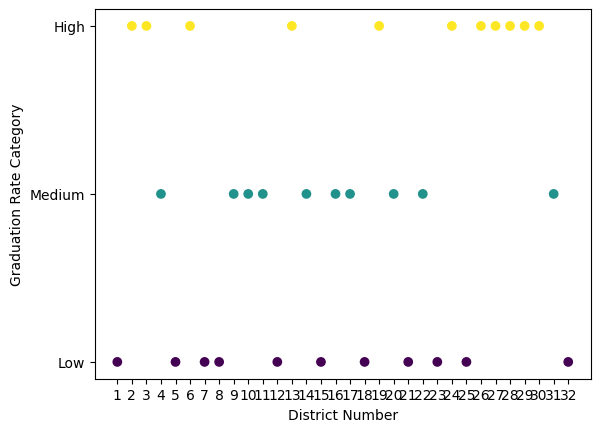

In [4]:
plt.scatter(df['District_Num'], df['grad_rate_cat'], c=pd.cut(df['graduation_rate'], bins=bins).cat.codes, cmap='viridis')

# Set the x-axis label
plt.xlabel('District Number')

# Set the y-axis label
plt.ylabel('Graduation Rate Category')

plt.xticks(range(1, 33))

plt.rcParams["figure.figsize"] = [10.00, 3.00]

# Show the plot
plt.show()